<a href="https://colab.research.google.com/github/rogermelo23/data_science/blob/main/Analisando_os_Dados_do_Airbnb_New_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *New York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de New York, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-08-04/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* id
* name
* host_id
* host_name
* neighbourhood_group
* neighbourhood
* latitude
* longitude
* room_type
* price
* minimum_nights
* number_of_reviews
* last_review
* reviews_per_month
* calculated_host_listings_count
* availability_365


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.34,3,341
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,75,1,408,2021-06-29,5.09,1,212
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.55,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,1,2014-01-02,0.01,1,184
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,61,2,485,2021-07-18,3.63,1,255


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa com 36724 entradas e 106 variáveis (listings.csv.gz).

In [ ]:
# identificar o volume de dados do DataFrame
df.shape
print("Entrada:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))
# verificar os tipos de variáveis do dataset
df.info()

Entrada:	 36724
Variáveis:	 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36724 entries, 0 to 36723
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              36724 non-null  int64         
 1   name                            36711 non-null  object        
 2   host_id                         36724 non-null  int64         
 3   host_name                       36701 non-null  object        
 4   neighbourhood_group             36724 non-null  object        
 5   neighbourhood                   36724 non-null  object        
 6   latitude                        36724 non-null  float64       
 7   longitude                       36724 non-null  float64       
 8   room_type                       36724 non-null  object        
 9   price                           36724 non-null  int64         
 10  minimum_nights                  36724 n

##### **Convertendo o campo last_review de objeto para formato Data**

In [ ]:
# convertendo em data
df.last_review = pd.to_datetime(df.last_review, format='%Y-%m-%d')

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


*   É possível observar que o campo *reviews_per_month* e *last_review* tem 25% dos dados nulos.
*   Os outros campos possuem um valor muito baixo ou nenhum valor nulo no Dadaset.



In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.256372
last_review                       0.256372
host_name                         0.000626
name                              0.000354
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9a5185990>,
      dtype=object)

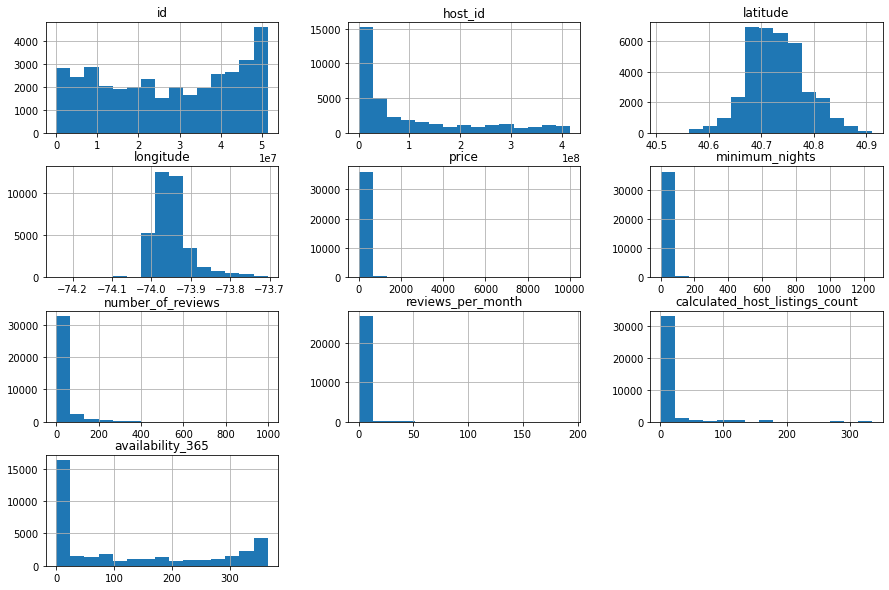

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

### **Q4. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis *price*, *minimum_nights* e *calculated_host_listings_count*.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

*   Resumo estatístico por meio do método describe()
*   Plotar boxplots para a variável.




In [ ]:
# ver o resumo estatísticos das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36724.000000,36724.000000,36724.000000,27309.000000,36724.000000,36724.000000
mean,160.109057,22.482083,22.854836,1.375435,13.432306,122.570608
std,293.888431,28.361534,49.188479,3.850175,46.293004,138.765815
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,67.000000,3.000000,0.000000,0.110000,1.000000,0.000000
50%,108.000000,30.000000,4.000000,0.420000,1.000000,57.000000
75%,175.000000,30.000000,19.000000,1.450000,3.000000,259.000000
max,10000.000000,1250.000000,998.000000,192.930000,335.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

*   A variável price possui 75% do valor abaixo de 175, porém seu valor máximo é 10000.
*   A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.



#### *Box Plot para minimum_nights*

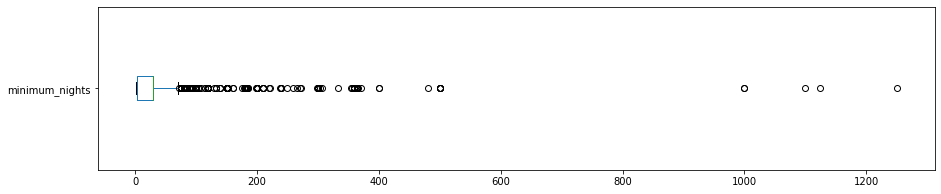

minimum_nights valores acima de 30:
1342 entradas
3.6543%


In [ ]:
#minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### *Box Plot para price*

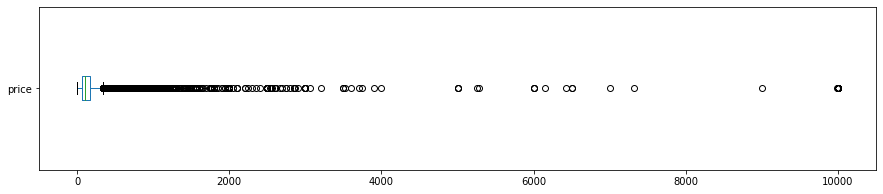

price valores acima de 1000:
284 entradas
0.7733%


In [ ]:
#price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 1000 dias para price
print("price valores acima de 1000:")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

#### *Histogramas sem outliers*
Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa80ce05310>,
      dtype=object)

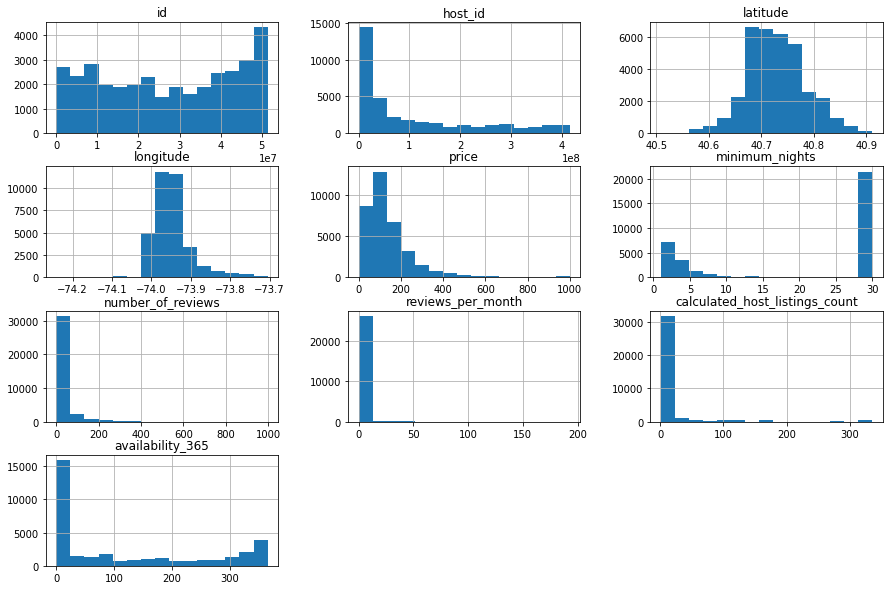

In [ ]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10))


### **Q5. Qual a correlação existente entre as variáveis?**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca *seaborn*

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                  'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.072475,-0.039923,0.007228,0.031618,0.108636
minimum_nights,-0.072475,1.000000,-0.269028,-0.290027,0.143230,-0.150409
number_of_reviews,-0.039923,-0.269028,1.000000,0.327712,-0.102941,0.114304
reviews_per_month,0.007228,-0.290027,0.327712,1.000000,-0.005207,0.121718
calculated_host_listings_count,0.031618,0.143230,-0.102941,-0.005207,1.000000,0.247706
availability_365,0.108636,-0.150409,0.114304,0.121718,0.247706,1.000000


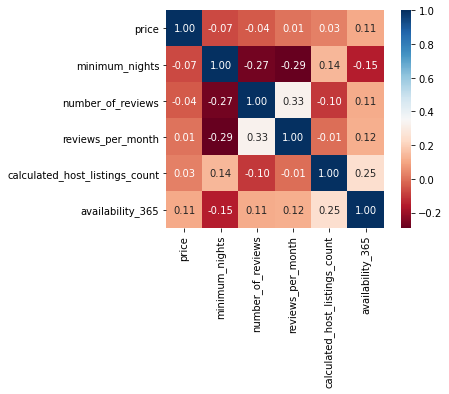

In [ ]:
# Mapa de calor com as correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q6. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

143.8712386483332

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável *room_type* indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método *value_counts()*.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    18501
Private room       15812
Shared room          567
Hotel room           247
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.526689
Private room       0.450138
Shared room        0.016141
Hotel room         0.007032
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de NY?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fort Wadsworth       800.000000
Prince's Bay         397.500000
Tottenville          350.000000
Tribeca              320.319728
Willowbrook          309.000000
Theater District     268.145985
Todt Hill            259.500000
SoHo                 249.341564
Flatiron District    246.606061
Midtown              244.392341
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

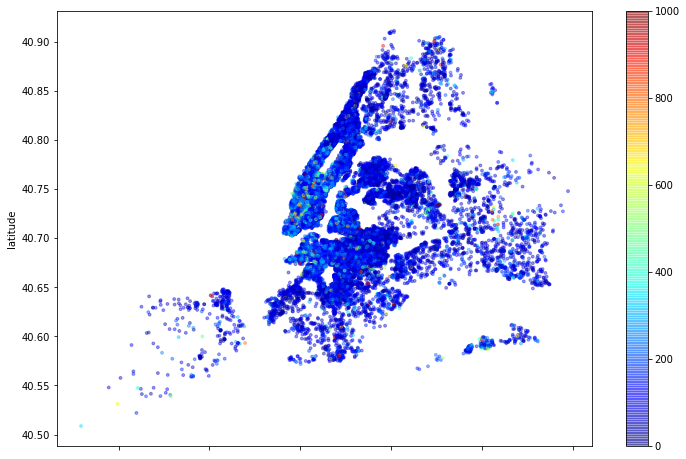

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

19.706379707916987

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.